In [9]:
import os
import tensorflow as tf


In [51]:
import numpy as np
width = 128
height = 128
channel =3
train_path = '/Users/karunparashar/Downloads/opencityAI/images-256/'
mask_path = '/Users/karunparashar/Downloads/opencityAI/masks-256/'
#the following piece walks through the available folders within the train_path and mask_path respectively
train_id = next(os.walk(train_path))[2]
mask_id = next(os.walk(mask_path))[2]
#to create X and Y arrays to be later filled with images of both images and masks
x_train = np.zeros((len(train_id),height,width,channel),dtype = np.uint8)
y_train = np.zeros((len(mask_id),height,width,1),dtype = np.bool)

In [53]:
from tqdm import tqdm
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
import cv2
print("resizing training images and masks")
for n,id_ in tqdm(enumerate(train_id),total=len(train_id)):
    path = train_path+id_
    img = imread(path)[:,:,:channel]
    img = resize(img,(height,width),mode ='constant',preserve_range =True)
    x_train[n] = img
for n2,id2_ in tqdm(enumerate(mask_id),total=len(mask_id)):
    path2 = mask_path+id2_
    mask_ = imread(path2)
    #increasing the dimensions of the masks as the ndim for those is 2
    mask_ = np.expand_dims(resize(mask_,(height,width),mode ='constant',preserve_range =True),axis=-1)
    y_train[n2]=mask_
        

  0%|          | 7/23607 [00:00<05:41, 69.14it/s]

resizing training images and masks


100%|██████████| 23607/23607 [04:46<00:00, 82.36it/s]


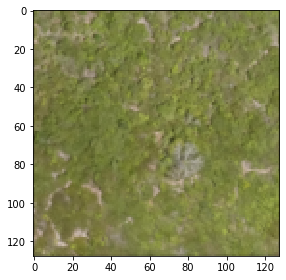

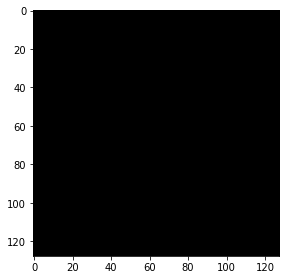

In [60]:
#sample of how the images and their masks looks like
import random
image_x = random.randint(0,23000)
imshow(x_train[image_x])
plt.show()
imshow(np.squeeze(y_train[image_x]))
plt.show()